# Generalization in Linear Model

In [1]:
# Library
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston #dataset

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.metrics import mean_squared_error

## Data

In [2]:
boston= load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [7]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [13]:
x=pd.DataFrame(boston['data'], columns= boston['feature_names'])
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


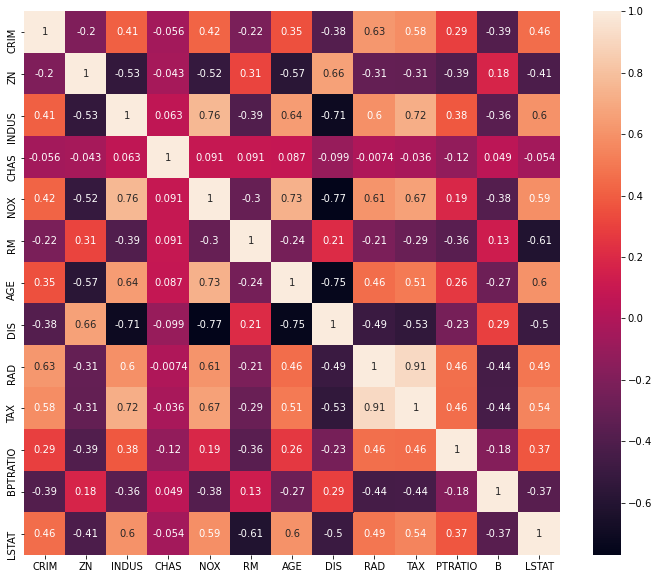

In [55]:
plt.figure(figsize=(12,10))
sns.heatmap(x.corr(), annot=True)

In [18]:
y=pd.Series(boston['target'])
y.head()


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

In [19]:
# data splitting
x_train, x_test, y_train, y_test= train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=2020
)

## Ridge Regression

In [30]:
hyperparam_c=[100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001,0.00001]
testing_mse=[]
training_mse=[]
score=0

for i in range(len(hyperparam_c)):
   ridge=Ridge(alpha=hyperparam_c[i]) #model
   ridge.fit(x_train, y_train)

   y_predict_train= ridge.predict(x_train)
   training_mse.append(mean_squared_error(y_train, y_predict_train))

   y_predict_test= ridge.predict(x_test)
   mse_score= mean_squared_error(y_test,y_predict_test)
   testing_mse.append(mse_score)

   if i==0:
       score=mse_score
       best_c=hyperparam_c[i]

   if score>mse_score:
       score= mse_score
       best_c=hyperparam_c[i]

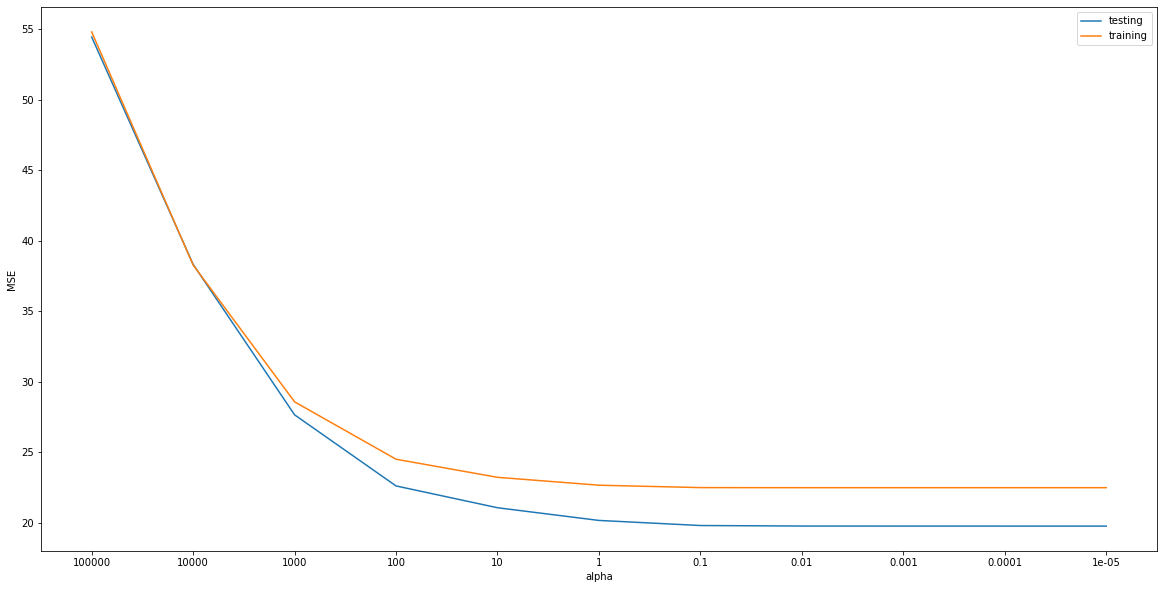

In [31]:
length= range (len(hyperparam_c))

plt.figure(figsize=(20,10))
sns.lineplot(length, testing_mse)
sns.lineplot(length, training_mse)
plt.legend(['testing','training'])
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.xticks(length,hyperparam_c)
plt.show()

In [32]:
print(best_c)
print(mse_score)

1e-05
19.773995820684117


In [37]:
ridge= Ridge(alpha=0.001)
ridge.fit(x_train, y_train)

Ridge(alpha=0)

In [36]:
pd.DataFrame({
    'feature_names': list(x),
    'coef':ridge.coef_
})

,feature_names,coef
0,CRIM,-0.106949
1,ZN,0.044557
2,INDUS,0.023650
3,CHAS,2.237157
4,NOX,-16.844632
5,RM,3.879980
6,AGE,0.000043
7,DIS,-1.379343
8,RAD,0.304683
9,TAX,-0.012167


In [38]:
pd.DataFrame({
    'feature_names': list(x),
    'coef':ridge.coef_
}) #tanpa pinalti

,feature_names,coef
0,CRIM,-0.106957
1,ZN,0.044556
2,INDUS,0.023705
3,CHAS,2.237422
4,NOX,-16.858394
5,RM,3.879867
6,AGE,0.000055
7,DIS,-1.379544
8,RAD,0.304718
9,TAX,-0.012166


1. ketika alpha diset terlalu tinggi, model memiliki kecenderungan underfitting; nilai mse train dan test tinggi dan model terlalu simple
2. penurunan nilai alpha juga menurunkan nilai mse train dan test

## Lasso

In [39]:
hyperparam_c=[100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001]
testing_mse=[]
training_mse=[]
score=0

for i in range (len(hyperparam_c)):
    lasso=Lasso(alpha=hyperparam_c[i])
    lasso.fit(x_train,y_train)
    
    y_predict_train=lasso.predict(x_train)
    training_mse.append(mean_squared_error(y_train, y_predict_train))
    
    y_predict_test=lasso.predict(x_test)
    mse_score=mean_squared_error(y_test, y_predict_test)
    testing_mse.append(mse_score)
    
    if i==0:
        score=mse_score
        best_c= hyperparam_c[i]
        
    if score> mse_score:
        score=mse_score
        best_c= hyperparam_c[i]

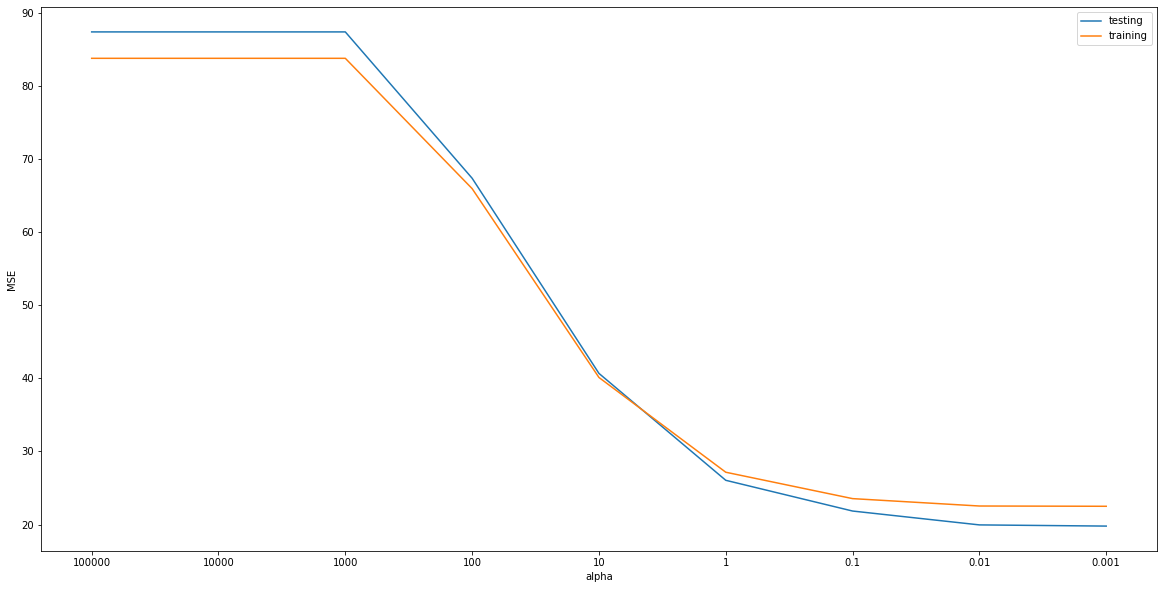

In [42]:
length = range(len(hyperparam_c))

plt.figure(figsize=(20,10))
sns.lineplot(length,testing_mse)
sns.lineplot(length, training_mse)
plt.legend(['testing','training'])
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.xticks(length,hyperparam_c)
plt.show()

In [43]:
print(best_c)
print(score)

0.001
19.78809202986975


In [45]:
lasso=Lasso(alpha=best_c)
lasso.fit(x_train,y_train)

Lasso(alpha=0.001)

In [46]:
pd.DataFrame({
    'feature names': list(x),
    'coef': lasso.coef_
})

,feature names,coef
0,CRIM,-0.106746
1,ZN,0.044582
2,INDUS,0.022342
3,CHAS,2.217609
4,NOX,-16.517894
5,RM,3.880717
6,AGE,-0.000176
7,DIS,-1.374139
8,RAD,0.303877
9,TAX,-0.012196


In [49]:
lasso=Lasso(alpha=1000)
lasso.fit(x_train,y_train)

Lasso(alpha=1000)

In [50]:
pd.DataFrame({
    'feature names': list(x),
    'coef': lasso.coef_
})

,feature names,coef
0,CRIM,-0.0
1,ZN,0.0
2,INDUS,-0.0
3,CHAS,0.0
4,NOX,-0.0
5,RM,0.0
6,AGE,-0.0
7,DIS,0.0
8,RAD,-0.0
9,TAX,-0.0


1. ketika alpha diset terlalu tinggi, model memiliki kecenderungan underfitting; nilai mse train dan test tinggi dan model terlalu simple
2. penurunan nilai alpha juga menurunkan nilai mse train dan test

# Latihan

In [61]:
df=pd.read_csv('Admission_Predict.csv')

In [62]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Gunakan data Admission_Predict dan metode Ridge dan Lasso:
    * Cari nilai alpha terbaik untuk metode ridge dan lasso
    * Bandingkan performa kedua model

In [63]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [65]:
df=df.rename(columns={'LOR ': 'LOR', 'Chance of Admit ':'Chance of Admit'})

In [68]:
x= df.iloc[:,1:-2]
y=df.iloc[:,-1]

In [69]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21
...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04
396,325,107,3,3.0,3.5,9.11
397,330,116,4,5.0,4.5,9.45
398,312,103,3,3.5,4.0,8.78


In [70]:
x.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
dtype: int64

In [71]:
x_train, x_test, y_train, y_test= train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=2020
)

In [78]:
# Ridge

hyperparam_c=[100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001]
testing_mse=[]
training_mse=[]
score=0

for i in range(len(hyperparam_c)):
   ridge=Ridge(alpha=hyperparam_c[i]) #model
   ridge.fit(x_train, y_train)

   y_predict_train= ridge.predict(x_train)
   training_mse.append(mean_squared_error(y_train, y_predict_train))

   y_predict_test= ridge.predict(x_test)
   mse_score= mean_squared_error(y_test,y_predict_test)
   testing_mse.append(mse_score)

   if i==0:
       score=mse_score
       best_c=hyperparam_c[i]

   if score>mse_score:
       score= mse_score
       best_c=hyperparam_c[i]

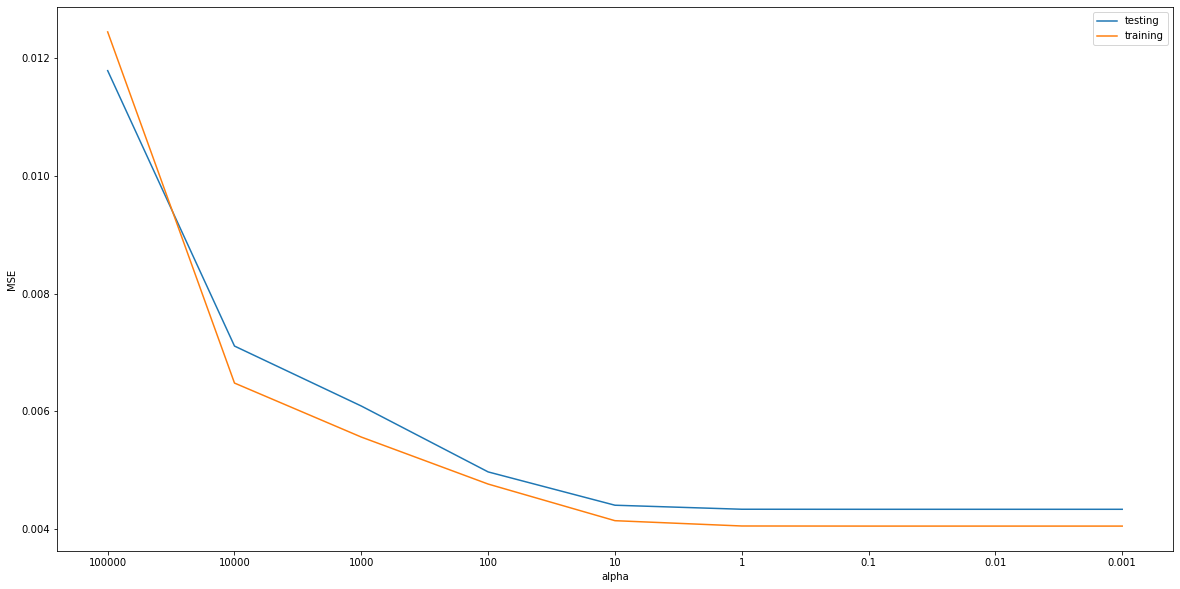

In [79]:
length= range (len(hyperparam_c))

plt.figure(figsize=(20,10))
sns.lineplot(length, testing_mse)
sns.lineplot(length, training_mse)
plt.legend(['testing','training'])
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.xticks(length,hyperparam_c)
plt.show()

In [80]:
print(best_c, score)

0.1 0.004331851989904721


In [75]:
#Lasso
hyperparam_c=[100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001]
testing_mse=[]
training_mse=[]
score=0

for i in range (len(hyperparam_c)):
    lasso=Lasso(alpha=hyperparam_c[i])
    lasso.fit(x_train,y_train)
    
    y_predict_train=lasso.predict(x_train)
    training_mse.append(mean_squared_error(y_train, y_predict_train))
    
    y_predict_test=lasso.predict(x_test)
    mse_score=mean_squared_error(y_test, y_predict_test)
    testing_mse.append(mse_score)
    
    if i==0:
        score=mse_score
        best_c= hyperparam_c[i]
        
    if score> mse_score:
        score=mse_score
        best_c= hyperparam_c[i]

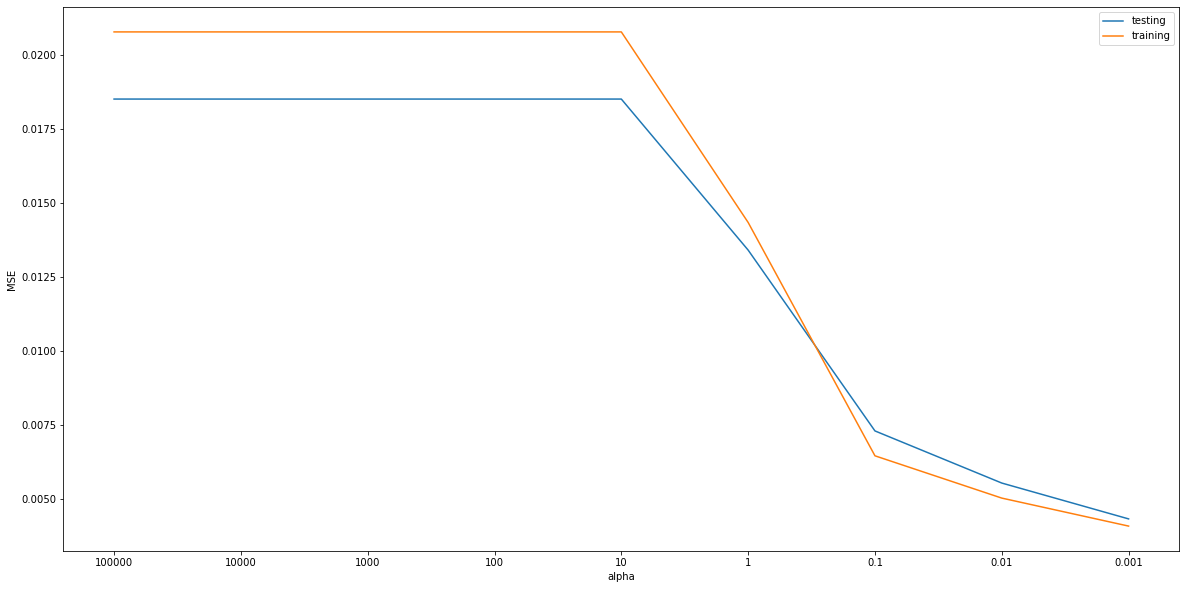

In [76]:
length= range (len(hyperparam_c))

plt.figure(figsize=(20,10))
sns.lineplot(length, testing_mse)
sns.lineplot(length, training_mse)
plt.legend(['testing','training'])
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.xticks(length,hyperparam_c)
plt.show()

In [77]:
print(best_c,score)

0.001 0.00431113753060403


In [93]:
import statsmodels.api as sm
from statsmodels.api import OLS

In [94]:
sm=OLS(y, sm.add_constant(x))
result= sm.fit()

In [95]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     259.9
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          1.99e-133
Time:                        10:59:17   Log-Likelihood:                 532.59
No. Observations:                 400   AIC:                            -1051.
Df Residuals:                     393   BIC:                            -1023.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4139      0.11